# Prediction the Height of a Person based on Parents Height

Sir Francis Galton (1822-1911) was an English mathematician.  In 1886, he published a paper
entitled "Regression Towards Mediocrity in Hereditary Stature".  In this paper, he
investigated the relationship between the heights of fathers and sons.  He found that
tall fathers tended to have tall sons, but that the sons were not as tall as their fathers.
Likewise, short fathers tended to have short sons, but the sons were not as short as their
fathers.  Galton called this phenomenon "regression toward mediocrity", which is the
origin of the term "regression".  Galton's paper is available at
http://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf

Galton's data is available at http://www.randomservices.org/random/data/Galton.html

The data is in a file called "Galton.txt".  The data is in tab-separated-value format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

In [7]:
# Read the data into a Pandas DataFrame
advert = pd.read_csv('Galton.txt', sep='\t')

advert['GenderValue'] = advert['Gender']=='M'
advert.head()

,Family,Father,Mother,Gender,Height,Kids,GenderValue
0,1,78.5,67.0,M,73.2,4,True
1,1,78.5,67.0,F,69.2,4,False
2,1,78.5,67.0,F,69.0,4,False
3,1,78.5,67.0,F,69.0,4,False
4,2,75.5,66.5,M,73.5,4,True


Text(0, 0.5, 'Height')

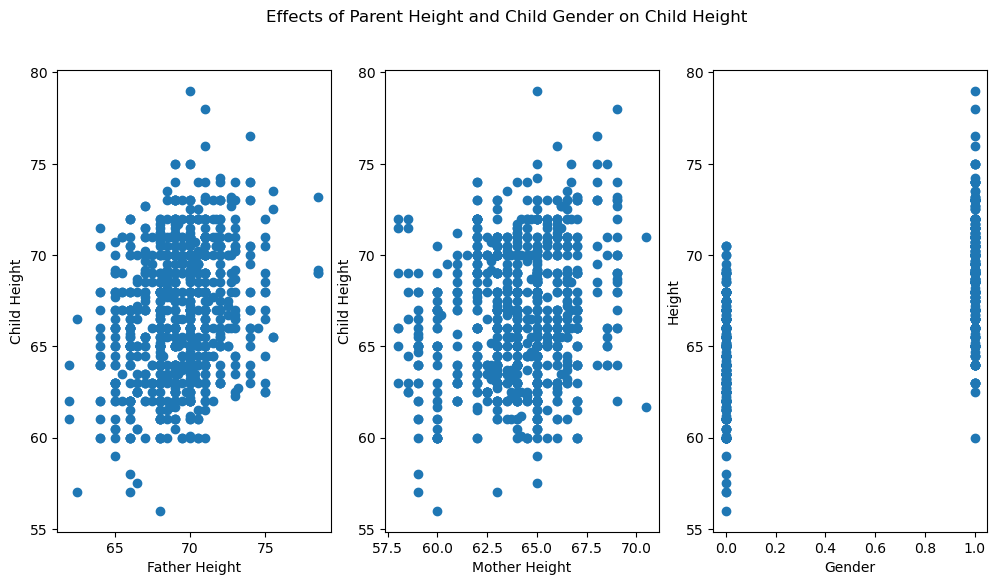

In [8]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle("Effects of Parent Height and Child Gender on Child Height")
ax[0].plot(advert['Father'], advert['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].set_xlabel('Father Height')
ax[0].set_ylabel('Child Height')

ax[1].plot(advert['Mother'], advert['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].set_xlabel('Mother Height')
ax[1].set_ylabel('Child Height')

ax[2].plot(advert['GenderValue'], advert['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Height')

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     529.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          1.33e-197
Time:                        13:00:47   Log-Likelihood:                -1961.4
No. Observations:                 898   AIC:                             3931.
Df Residuals:                     894   BIC:                             3950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.3448    

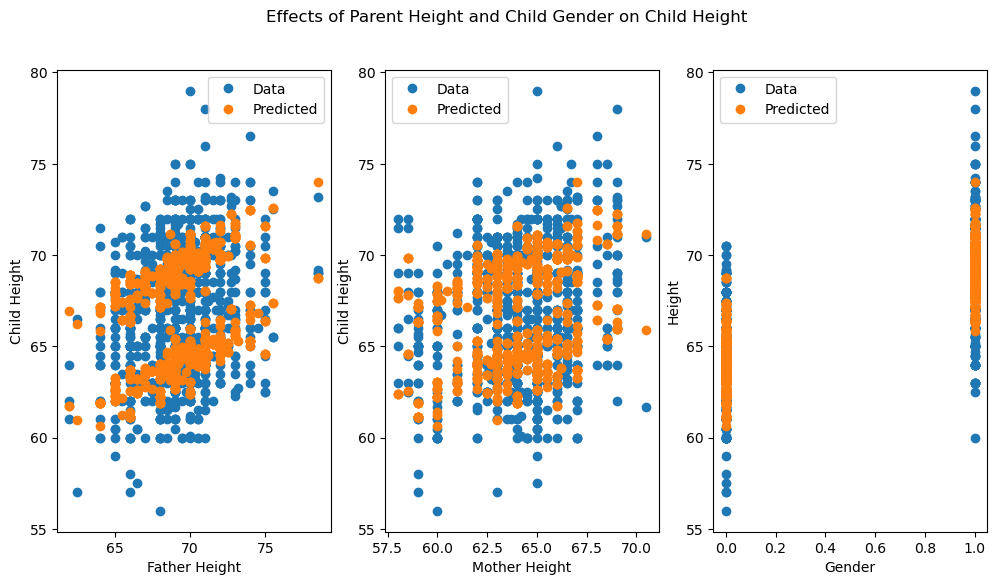

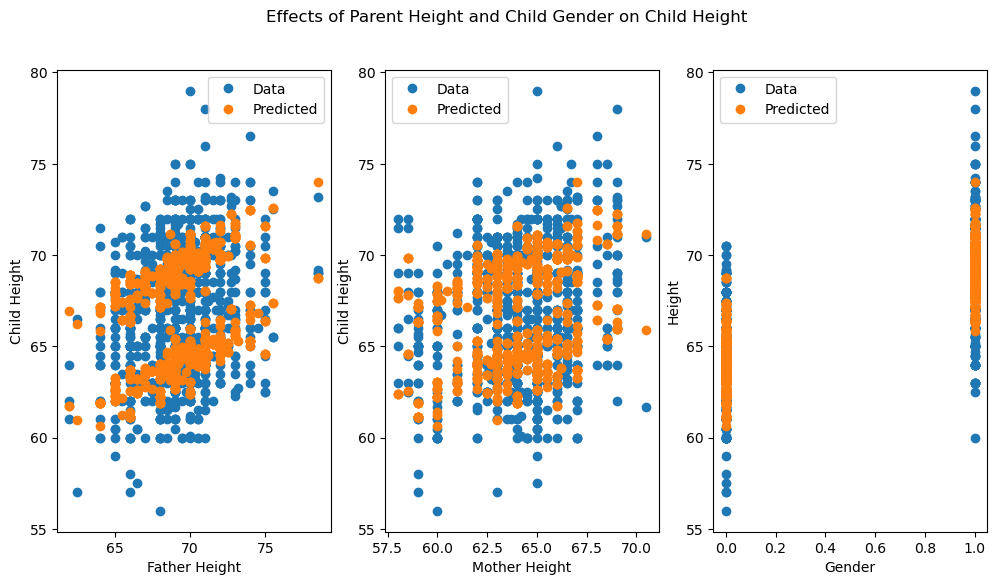

In [10]:
# Fit a linear regression model to a single parameter - Sales vs. TV advertising costs
model = smf.ols('Height ~ Father + Mother + GenderValue', data=advert)
model = model.fit()

# View model summary
print(model.summary())

# Predict values
height_pred = model.predict()

# Add this prediction to the DataFrame
advert['Height_Predicted'] = height_pred
# Add the DIFFERENCE between Height data and prediction to the DataFrame
advert['Height_Residual'] = advert['Height'] - height_pred
print(advert.head())

# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle("Effects of Parent Height and Child Gender on Child Height")
ax[0].plot(advert['Father'], advert['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].plot(advert['Father'], advert['Height_Predicted'], 'o', label = "Predicted")           # scatter plot showing actual data
ax[0].legend()
ax[0].set_xlabel('Father Height')
ax[0].set_ylabel('Child Height')

ax[1].plot(advert['Mother'], advert['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].plot(advert['Mother'], advert['Height_Predicted'], 'o', label = "Predicted")           # scatter plot showing actual data
ax[1].legend()
ax[1].set_xlabel('Mother Height')
ax[1].set_ylabel('Child Height')

ax[2].plot(advert['GenderValue'], advert['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].plot(advert['GenderValue'], advert['Height_Predicted'], 'o', label = "Predicted")           # scatter plot showing actual data
ax[2].legend()
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Height')

fig